## Head

In [357]:
%%writefile 'C:\Users\leoni\OneDrive\Documentos\AT_Projeto_Bloco_Streamlit\ExploratoryAnalysis.py'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import streamlit as st
import StreamlitCustomLibrary as at_lib

at_lib.SetPageConfig()
at_lib.SetTheme()

st.header('Análise exploratória',divider=True)

st.markdown(at_lib.GetBasicTextMarkdown(25,
    '''
    Finalmente com o dataset limpo e pronto para ser utilizado, podemos começar a análise exploratória e identificar\
    as variáveis independentes que mais influenciam na variável dependente, que é o número total de reviews.
    '''),unsafe_allow_html=True)

df_steam = pd.read_csv('SteamDatasetForStreamlitCleaned.csv',engine='pyarrow')

st.markdown(at_lib.GetBasicTextMarkdown(20,
    f'''
    O dataset atualmente possui {df_steam.shape[0]} linhas e {df_steam.shape[1]} colunas.
    '''),unsafe_allow_html=True)

st.dataframe(df_steam,hide_index=True,height=250)

st.divider()

#nCols = ['total_duration','total_achievements','total_supported_languages','positive_reviews_percent','price', 'self_published_percent','commercialization_days']
df_steam_numerics = df_steam.drop(columns=['name','id','release_date','tags','main_genre','hasSingleplayer','hasMultiplayer','hasCoop','self_published_percent'])


x_plots = 2
y_plots = 3



Overwriting C:\Users\leoni\OneDrive\Documentos\AT_Projeto_Bloco_Streamlit\ExploratoryAnalysis.py


In [358]:
%%writefile -a 'C:\Users\leoni\OneDrive\Documentos\AT_Projeto_Bloco_Streamlit\ExploratoryAnalysis.py'
st.subheader('Filtros',divider=True)

st.markdown(at_lib.GetBasicTextMarkdown(25,
    '''
    Aqui estão alguns controladores para filtrar os dados, removendo outliers de cada coluna. Mais abaixo estão os gráficos\
    que permitem visualizar os dados filtrados. 
    '''),unsafe_allow_html=True)
#É importante que essa filtragem seja feita já pensando no tipo de jogo que se\
 #   quer prever, por exemplo, RPGs tendem a ter uma duração maior que jogos de plataforma, portanto eliminar os outliers superiores\
   # pode não ser uma ideia adequada cas
cols = st.columns(3)
with cols[0]:
    min_max_duration = st.slider("Duração total:", value=(df_steam_numerics['total_duration'].min(), df_steam_numerics['total_duration'].max()))
    df_steam_numerics = df_steam_numerics[(df_steam_numerics['total_duration'] >= min_max_duration[0]) & (df_steam_numerics['total_duration'] <= min_max_duration[1])]
    min_max_positive_reviews_percent = st.slider("Porcentagem de reviews positivas:", value=(df_steam_numerics['positive_reviews_percent'].min(), df_steam_numerics['positive_reviews_percent'].max()))
    df_steam_numerics = df_steam_numerics[(df_steam_numerics['positive_reviews_percent'] >= min_max_positive_reviews_percent[0]) & (df_steam_numerics['positive_reviews_percent'] <= min_max_positive_reviews_percent[1])]
with cols[1]:
    min_max_commercialization_days = st.slider("Dias de comercialização:", value=(df_steam_numerics['commercialization_days'].min(), df_steam_numerics['commercialization_days'].max()))
    df_steam_numerics = df_steam_numerics[(df_steam_numerics['commercialization_days'] >= min_max_commercialization_days[0]) & (df_steam_numerics['commercialization_days'] <= min_max_commercialization_days[1])]
    min_max_total_supported_languages = st.slider("Número de idiomas suportados:", value=(df_steam_numerics['total_supported_languages'].min(), df_steam_numerics['total_supported_languages'].max()))
    df_steam_numerics = df_steam_numerics[(df_steam_numerics['total_supported_languages'] >= min_max_total_supported_languages[0]) & (df_steam_numerics['total_supported_languages'] <= min_max_total_supported_languages[1])]
with cols[2]:
    min_max_price = st.slider("Faixa de preço:", value=(df_steam_numerics['price'].min(), df_steam_numerics['price'].max()))
    df_steam_numerics = df_steam_numerics[(df_steam_numerics['price'] >= min_max_price[0]) & (df_steam_numerics['price'] <= min_max_price[1])]
    min_max_total_achievements = st.slider("Número de conquistas:", value=(df_steam_numerics['total_achievements'].min(), df_steam_numerics['total_achievements'].max()))
    df_steam_numerics = df_steam_numerics[(df_steam_numerics['total_achievements'] >= min_max_total_achievements[0]) & (df_steam_numerics['total_achievements'] <= min_max_total_achievements[1])]


Appending to C:\Users\leoni\OneDrive\Documentos\AT_Projeto_Bloco_Streamlit\ExploratoryAnalysis.py


## Boxplots

In [359]:
%%writefile -a 'C:\Users\leoni\OneDrive\Documentos\AT_Projeto_Bloco_Streamlit\ExploratoryAnalysis.py'
st.subheader('Boxplot',divider=True)

fig, axs = plt.subplots(x_plots,y_plots,figsize=(15, 15))

i  = 0
for r in range(x_plots):
    for c in range(y_plots):
        colName = df_steam_numerics.columns[i]
        if colName == 'total_reviews':
            i = i + 1
            colName = df_steam_numerics.columns[i]
        sb.boxplot(data=df_steam_numerics[colName],  ax=axs[r, c], orient='v',color=sb.color_palette()[i % len(sb.color_palette())])
        i = i + 1
        
plt.subplots_adjust(wspace=0.3, hspace=0.3)
st.pyplot(fig)

Appending to C:\Users\leoni\OneDrive\Documentos\AT_Projeto_Bloco_Streamlit\ExploratoryAnalysis.py


## Dispersão

In [360]:
%%writefile -a 'C:\Users\leoni\OneDrive\Documentos\AT_Projeto_Bloco_Streamlit\ExploratoryAnalysis.py'
st.subheader('Dispersão',divider=True)

fig, axs = plt.subplots(x_plots,y_plots,figsize=(15, 10))

i  = 0
for r in range(x_plots):
    for c in range(y_plots):
        if df_steam_numerics.columns[i] == 'total_reviews':
            i += 1
        sb.regplot(data=df_steam_numerics, x=df_steam_numerics.columns[i], y='total_reviews', ax=axs[r, c],
        color= sb.color_palette()[i % len(sb.color_palette())],line_kws={'color':'red'})
        i += 1
        
plt.subplots_adjust(wspace=0.3, hspace=0.3)
st.pyplot(fig)

Appending to C:\Users\leoni\OneDrive\Documentos\AT_Projeto_Bloco_Streamlit\ExploratoryAnalysis.py


## Heatmap

In [361]:
%%writefile -a 'C:\Users\leoni\OneDrive\Documentos\AT_Projeto_Bloco_Streamlit\ExploratoryAnalysis.py'
st.subheader('Mapa de calor',divider=True)
fig, ax = plt.subplots(figsize=(15, 5))

nOrder = list(df_steam_numerics.columns)
nOrder.remove('total_reviews')
nOrder.append('total_reviews')

df_steam_numerics = df_steam_numerics[nOrder]

df_steam_corr = df_steam_numerics.corr()
sb.heatmap(df_steam_corr, annot=True, fmt='.2f',cmap=sb.color_palette("coolwarm", as_cmap=True), ax=ax, mask=np.triu(df_steam_corr, k=1))
ax.axhline(6, color='white', linewidth=2)
ax.axhline(7, color='white', linewidth=4)

st.pyplot(fig)

Appending to C:\Users\leoni\OneDrive\Documentos\AT_Projeto_Bloco_Streamlit\ExploratoryAnalysis.py


f:\Anaconda\envs\INFNET_II\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Anaconda\envs\INFNET_II\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Anaconda\envs\INFNET_II\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Anaconda\envs\INFNET_II\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

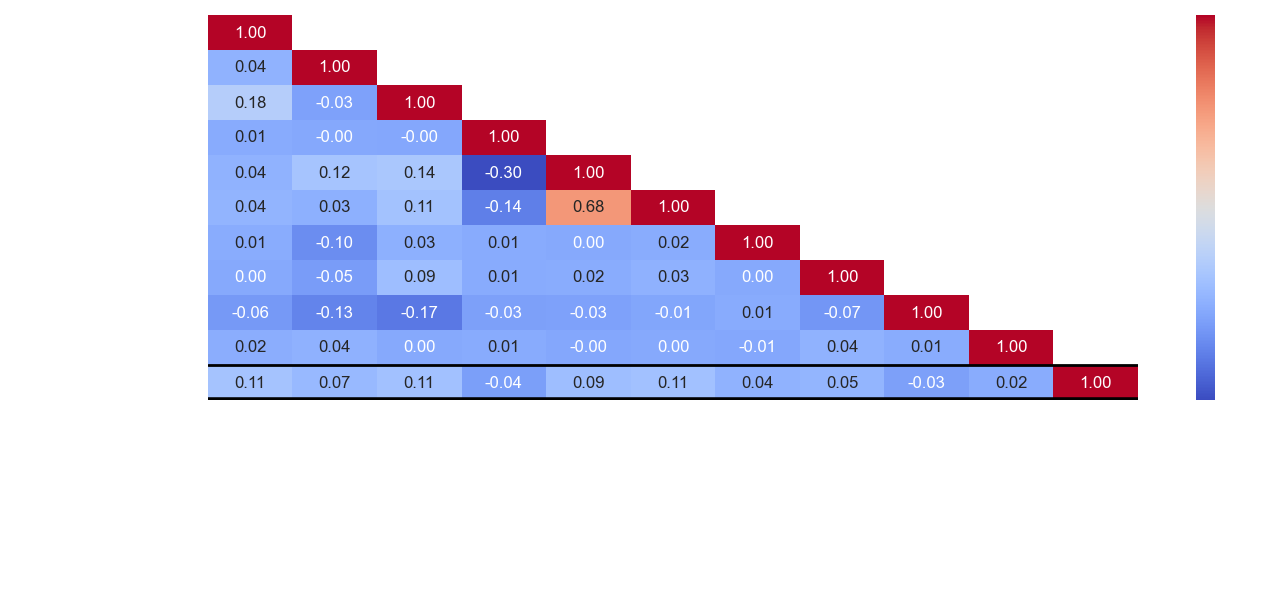

In [362]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler

df_steam = pd.read_csv('C:\\Users\\leoni\OneDrive\\Documentos\\AT_Projeto_Bloco_Streamlit\\SteamDatasetForStreamlitCleaned.csv',engine='pyarrow')


nCols = ['total_duration','total_achievements','total_supported_languages','positive_reviews_percent','price', 'self_published_percent','commercialization_days']

#print(df_steam.info())

#fig, ax = plt.subplots(figsize=(10,5))
#sb.boxplot(df_steam,ax=ax)

#plt.show()


fig, ax = plt.subplots(figsize=(15, 5))

df_steam_numerics = df_steam.drop(columns=['name','id','release_date','tags','main_genre'])

nOrder = list(df_steam_numerics.columns)
nOrder.remove('total_reviews')
nOrder.append('total_reviews')

df_steam_numerics = df_steam_numerics[nOrder]
#df_steam_numerics['total_reviews'] = np.log(df_steam_numerics['total_reviews'])

#df_steam_numerics['total_reviews'] = df_steam_numerics['total_reviews']/1000
#print(df_steam_numerics.describe())
scaler = MinMaxScaler()

df_rescaled = pd.DataFrame(scaler.fit_transform(df_steam_numerics), columns=df_steam_numerics.columns)

#for col in df_steam_numerics.columns:
#    if (col == 'total_reviews'):
#        continue
#    df_steam_numerics[col] = scaler.fit_transform(df_steam_numerics[[col]])

df_steam_corr = df_rescaled.corr()
sb.heatmap(df_steam_corr, annot=True, fmt='.2f',cmap=sb.color_palette("coolwarm", as_cmap=True), ax=ax, mask=np.triu(df_steam_corr, k=1))
ax.axhline(10, color='black', linewidth=2)
ax.axhline(11, color='black', linewidth=4)

plt.show()

<Axes: >

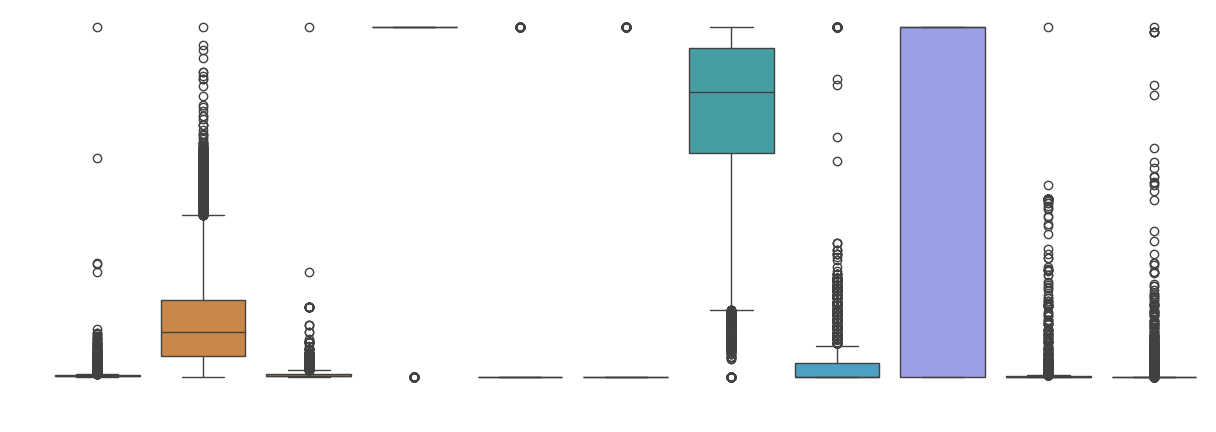

In [363]:
fig, ax = plt.subplots(figsize=(15, 5))

sb.boxplot(data=df_rescaled, ax=ax)

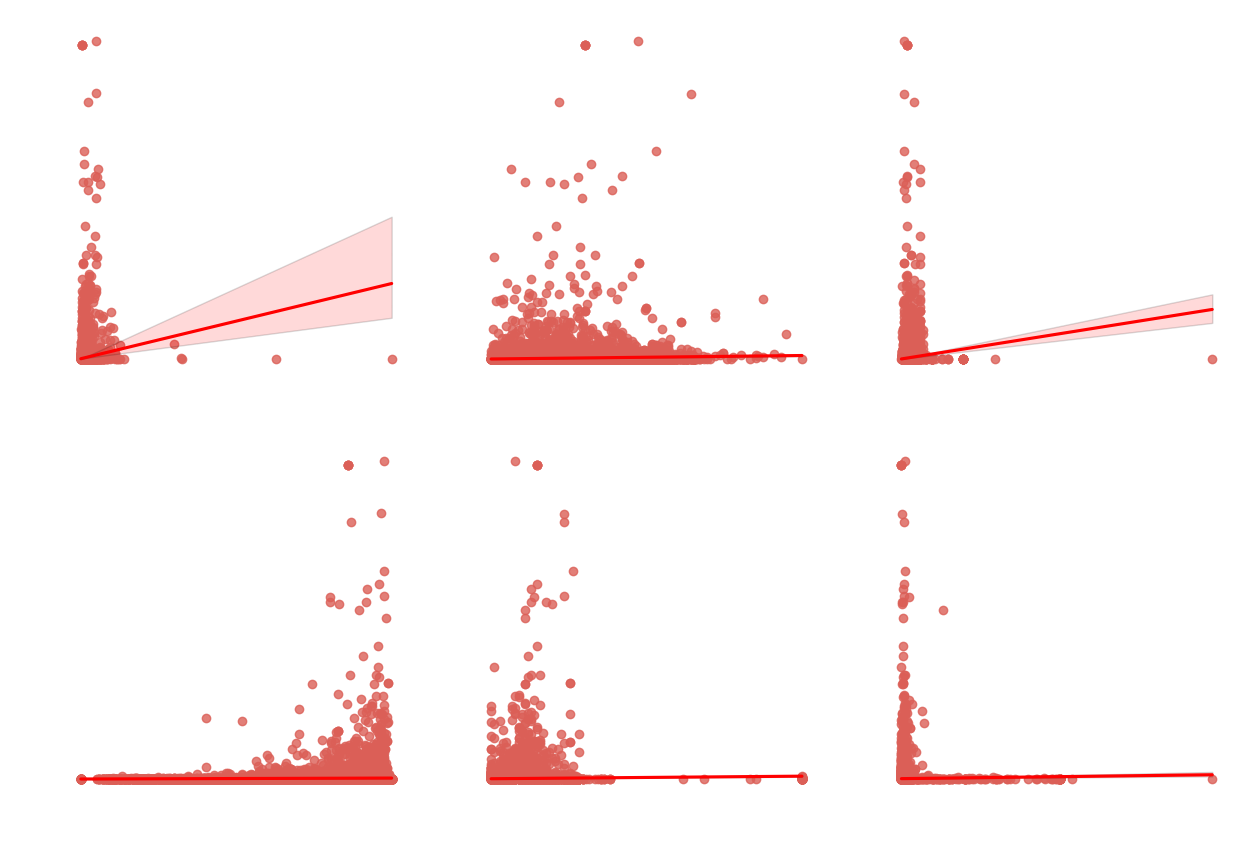

In [364]:
x_plots = 2
y_plots = 3

fig, axs = plt.subplots(x_plots,y_plots,figsize=(15, 10))

df_steam_numerics = df_steam.drop(columns=['name','id','release_date','tags','main_genre','hasSingleplayer','hasMultiplayer','hasCoop','self_published_percent'])

i  = 0
for r in range(x_plots):
    for c in range(y_plots):
        if df_steam_numerics.columns[i] == 'total_reviews':
            i += 1
        sb.regplot(data=df_steam_numerics, x=df_steam_numerics.columns[i], y='total_reviews', ax=axs[r, c], line_kws={'color':'red'})
        i+= 1


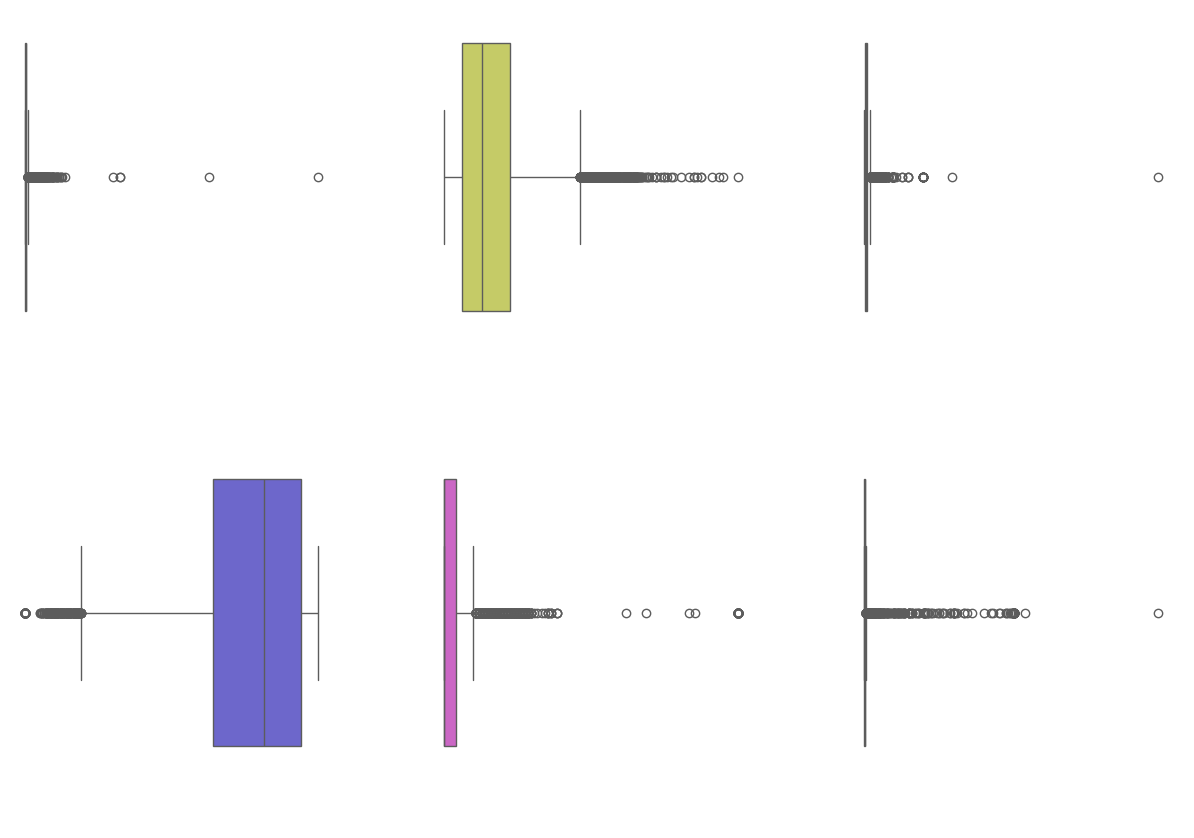

In [365]:
x_plots = 2
y_plots = 3

fig, axs = plt.subplots(x_plots,y_plots,figsize=(15, 10))

i  = 0
for r in range(x_plots):
    for c in range(y_plots):
        colName = df_steam_numerics.columns[i]
        if colName == 'total_reviews':
            i += 1
            colName = df_steam_numerics.columns[i]
        sb.boxplot(data=df_steam_numerics[colName],  ax=axs[r, c], orient='h',color=sb.color_palette()[i % len(sb.color_palette())])
        i += 1

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show() 

In [366]:
df_rescaled.describe()

,total_duration,commercialization_days,price,hasSingleplayer,hasMultiplayer,hasCoop,positive_reviews_percent,total_supported_languages,self_published_percent,total_achievements,total_reviews
count,48015.000000,48015.000000,48015.000000,48015.000000,48015.000000,48015.000000,48015.000000,48015.000000,48015.000000,48015.000000,48015.000000
mean,0.005314,0.152866,0.008451,0.980006,0.168551,0.087535,0.753507,0.036946,0.680956,0.002907,0.001354
std,0.008393,0.116363,0.011956,0.139980,0.374359,0.282621,0.239881,0.107416,0.461414,0.022635,0.017523
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002380,0.061208,0.002491,1.000000,0.000000,0.000000,0.640000,0.000000,0.000000,0.000000,0.000006
50%,0.002993,0.129066,0.004492,1.000000,0.000000,0.000000,0.814159,0.000000,1.000000,0.000916,0.000021
75%,0.005559,0.221604,0.009495,1.000000,0.000000,0.000000,0.939579,0.039216,1.000000,0.002444,0.000116
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [367]:
df_steam_numerics.describe()

,total_duration,commercialization_days,price,total_reviews,positive_reviews_percent,total_supported_languages,total_achievements
count,48015.000000,48015.000000,48015.000000,4.801500e+04,48015.000000,48015.000000,48015.000000
mean,5.736954,1475.027575,8.947181,1.638586e+03,0.753507,4.768489,28.551765
std,9.029673,1119.765684,11.949636,2.120686e+04,0.239881,10.956383,222.300749
min,0.020000,4.000000,0.500000,0.000000e+00,0.000000,1.000000,0.000000
25%,2.580000,593.000000,2.990000,7.000000e+00,0.640000,1.000000,0.000000
50%,3.240000,1246.000000,4.990000,2.600000e+01,0.814159,1.000000,9.000000
75%,6.000000,2136.500000,9.990000,1.400000e+02,0.939579,5.000000,24.000000
max,1075.830000,9627.000000,1000.000000,1.210252e+06,1.000000,103.000000,9821.000000


<Axes: ylabel='price'>

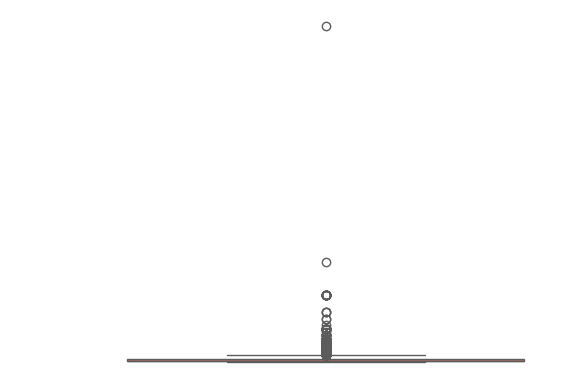

In [368]:
sb.boxplot(df_steam['price'])

In [369]:
df_steam[df_steam['price'] >70][['price','name','id']]

,price,name,id
9,199.99,Impossible Stunts,2471600
10,199.99,Fly Fly Dragon!,2471620
607,99.99,Bike Offroad Simulator,2400760
672,99.99,Last Day of Zombies,2394600
673,99.99,Destroy All Zombies,2394610
...,...,...,...
47214,149.99,Stay Home,2470700
47469,99.99,PGA TOUR 2K23,1588010
47499,99.99,Fire Truck Simulator,2018850
47943,79.99,SCARLET NEXUS,775500


In [370]:
df_steam[df_steam['name'] == "Houdini Indie"]

,name,id,release_date,tags,total_duration,main_genre,commercialization_days,price,hasSingleplayer,hasMultiplayer,hasCoop,total_reviews,positive_reviews_percent,total_supported_languages,self_published_percent,total_achievements


In [371]:
#df_steam[df_steam['tags'].conta(['Game Development'])]
df_steam['contains_my_string'] = df_steam['tags'].apply(lambda x: 'Game Development' in x)
df_steam[df_steam['contains_my_string'] == True][['name','id','tags']]

,name,id,tags


In [372]:
df_steam['contains_my_string'] = df_steam['tags'].apply(lambda x: 'Software' in x)
df_steam[df_steam['contains_my_string'] == True][['name','id','tags']]

,name,id,tags


- Mudar ID para inteiro df_steam['id'].astype(int)
- Mudar release date para dateType
- Mudar total_reviews para inteiro
- Mudar total_achievements par ainteiro

Mudar o preenchimento de dados faltantes que usem mediana/média para depois de remover tudo que é indesejável

In [373]:
df_steam = pd.read_csv('C:\\Users\\leoni\OneDrive\\Documentos\\AT_Projeto_Bloco_Streamlit\\SteamDatasetForStreamlitInspected.csv',engine='pyarrow')

In [374]:
list(df_steam[df_steam['name'] == "Houdini Indie"]['categories'])

["[{'id': 18, 'description': 'Partial Controller Support'}, {'id': 23, 'description': 'Steam Cloud'}]"]

In [375]:
df_steam.drop(df_steam[df_steam['scrap_status'] != 'Scrap_Sucess'].index,inplace=True)
df_steam.drop(df_steam[df_steam['type'] != 'game'].index,inplace=True)

In [376]:
import ast

def formatCategorie(c):
    try:
        return len(ast.literal_eval(c))
    except:
        return ''

df_steam['categories'] =  df_steam['categories'].apply(lambda x: formatCategorie(x))

In [377]:
df_steam[(df_steam['categories'] == '') & (df_steam['name'].apply(lambda n: 'Playtest' not in n if n != None else True))][['name','steam_appid','categories']]

,name,steam_appid,categories
153,Cursor Engine,2468390.0,
174,FBX2SPINE - 3D Mocap to 2D Animation Transfer ...,2467960.0,
267,Stream Environments: Cat Cafe,2463760.0,
306,QualityScaler,2463110.0,
725,Acidic Pro,2450380.0,
...,...,...,...
97554,Fuse,257400.0,
97581,VEGAS 19 Edit Steam Edition,1698340.0,
97683,Captain Gazman Day Of The Rage - Development Beta,2077300.0,
97686,Powder,1794970.0,


In [378]:
df_steam[(df_steam['name'].apply(lambda n: 'Playtest' in n if n != None else False))][['name','steam_appid','categories']]

,name,steam_appid,categories
0,Dose Response Playtest,2472500.0,
16,黑巢姐妹 Playtest,2472110.0,
19,FlipTiles: Warp Lines Playtest,2472150.0,
35,Arcane Wilds Playtest,2471560.0,
50,KISS: K-pop Idol StorieS - Road to Debut Playtest,2471930.0,
...,...,...,...
97890,The Finals Playtest,2076040.0,
97904,Hexarchy Playtest,1636390.0,
97930,Space Trash Scavenger Playtest,1832210.0,
97955,Battle Bands Playtest,1806380.0,


In [379]:
df_steam[(df_steam['categories'] == '') & (df_steam['name'].apply(lambda n: 'Playtest' not in n if n != None else True))][['name','steam_appid','categories']]

,name,steam_appid,categories
153,Cursor Engine,2468390.0,
174,FBX2SPINE - 3D Mocap to 2D Animation Transfer ...,2467960.0,
267,Stream Environments: Cat Cafe,2463760.0,
306,QualityScaler,2463110.0,
725,Acidic Pro,2450380.0,
...,...,...,...
97554,Fuse,257400.0,
97581,VEGAS 19 Edit Steam Edition,1698340.0,
97683,Captain Gazman Day Of The Rage - Development Beta,2077300.0,
97686,Powder,1794970.0,


## Tags proibidas


- 'Animation & Modeling'
- 'Game Development'
- 'Design & Illustration'
- 'Video Production'
- 'Utilities'
- 'Photo Editing'
- 'Software'
- 'VR'